# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [57]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [58]:
import numpy as np
import pandas as pd

# Define parameters
num_data_points = 10  # Number of data points
num_features = 5  # Number of features for each data point

# Generate random data points with multiple features
data = np.random.rand(num_data_points, num_features)

# Create column names for DataFrame
column_names = [f"Feature_{i+1}" for i in range(num_features)]

# Create DataFrame
df = pd.DataFrame(data, columns=column_names)

# Display the DataFrame
print("Generated DataFrame:")
print(df)


Generated DataFrame:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.206818   0.548226   0.226367   0.158039   0.841288
1   0.624902   0.985583   0.329353   0.707041   0.230367
2   0.881504   0.716908   0.946478   0.584753   0.203527
3   0.440002   0.881026   0.752252   0.241797   0.610638
4   0.130548   0.543076   0.412909   0.138542   0.963129
5   0.123875   0.839345   0.319002   0.797152   0.639702
6   0.524688   0.461540   0.841644   0.699500   0.034951
7   0.790747   0.960316   0.972955   0.552252   0.674903
8   0.103027   0.576998   0.702331   0.627687   0.487375
9   0.641569   0.752056   0.678060   0.877003   0.397828


In [59]:
def GUC_Distance ( Cluster_Centroids, Data_Points, Distance_Type ):
    if type(Data_Points) != np.ndarray:
        Data_Points = np.array(Data_Points)
    if Distance_Type == "Euclidean":
        distances = []
        for point in Data_Points:
            centroid_distances = []
            for centroid in Cluster_Centroids:
                distance = np.sqrt(np.sum((np.array(point) - np.array(centroid)) ** 2))
                centroid_distances.append(distance)
            distances.append(centroid_distances)
        distances = np.array(distances)
        print(distances)
    elif(Distance_Type=="Pearson"):
          
        distances = []
        
        
        for data_point in Data_Points:
            centroid_distances = []
            for centroid in Cluster_Centroids:
                
                pearson_corr, _ = pearsonr(centroid, data_point)
                
                distance = 1 - pearson_corr
                centroid_distances.append(distance)
            distances.append(centroid_distances)
            
        
        
                    
                
    return distances 

Cluster_Centroids = np.array([[0.456, 0.654, 0.222], [0.345, 0.123, 0.876]])
Data_points = np.array([[0.654, 0.111, 0.823], [0.234, 0.789, 0.567], [0.456, 0.789, 0.123], [0.987, 0.456, 0.654], [0.321, 0.234, 0.987]])

GUC_Distance(Cluster_Centroids,Data_points,"Euclidean")


[[0.83381893 0.31374193]
 [0.43189582 0.74253485]
 [0.16740968 1.01137827]
 [0.71259315 0.75652958]
 [0.88309116 0.15880176]]


array([[0.83381893, 0.31374193],
       [0.43189582, 0.74253485],
       [0.16740968, 1.01137827],
       [0.71259315, 0.75652958],
       [0.88309116, 0.15880176]])

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [60]:
def GUC_Kmean (Cluster_Centroids, Data_points, Distance_Type):
    if type(Data_points) == pd.DataFrame:
        Data_points=Data_points.values
    while True:
        distance_matrix = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        distance_matrix1=np.array(distance_matrix)
        min_values=[]
        min_indices=[]
        for arr in distance_matrix1:
            min_index = np.argmin(arr)
            min_indices.append(min_index)
            min_value = arr[min_index]
            min_values.append(min_value)
        min_values=np.array(min_values)
        min_indices=np.array(min_indices)
        clusters=[]
        for value in np.unique(min_indices):
          clusters.append([])
        for i, value in enumerate(min_indices):
          clusters[value].append(Data_points[i])
        new_centroids = []
        for cluster in clusters:
            if cluster:  # Check if the cluster is not empty
                # Calculate the mean of the points in the cluster
                mean_point = np.mean(cluster, axis=0)
                new_centroids.append(mean_point)
        mean_square_distances = []
        for cluster in clusters:
            distances = []
            for point in cluster:
                # Calculate the Euclidean distance for each data point in the cluster
                distance = np.linalg.norm(point - np.mean(cluster, axis=0))
                distances.append(distance)
            # Calculate the mean square distance for the cluster
            mean_square_distance = np.mean(np.square(distances))
            mean_square_distances.append(mean_square_distance)
        # Calculate distortion function (cluster metric)
        Cluster_Metric = np.sum(np.square(mean_square_distances))
        # Calculate distortion function (cluster metric)
        Cluster_Metric = np.sum(np.square(mean_square_distances))
        print(Cluster_Metric)
        # Check if centroids have changed
        if np.array_equal(new_centroids, Cluster_Centroids):
            break  # Stop if centroids have not changed

        Cluster_Centroids = new_centroids  # Update centroids for next iteration

        Final_Cluster_Distance = Cluster_Centroids  # Calculate final cluster distance if needed
        return [Final_Cluster_Distance , Cluster_Metric]    

In [61]:
Cluster_Centroids1 = np.array([[0.456, 0.654, 0.222,0.43,0.94], [0.345, 0.123, 0.876,0.32,0.84]])

GUC_Kmean( Cluster_Centroids1, df, "Pearson")

0.1146971834910965


[[array([0.36128563, 0.75821864, 0.45299047, 0.48659573, 0.61382537]),
  array([0.5749917 , 0.6789404 , 0.86585188, 0.61604806, 0.35018894])],
 0.1146971834910965]

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [62]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [63]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            
            print(km.labels_)
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def display_clusters_2d(data, cluster_result):
    """
    Display 2D clusters using custom KMeans.

    Parameters:
        data (numpy.ndarray): Input data with shape (n_samples, 2).
        cluster_result (list): Result of custom KMeans algorithm, containing cluster centroids and cluster metric.

    Returns:
        None (displays the plot).
    """
    if data.shape[1] != 2:
        raise ValueError("Input data must have exactly 2 features for 2D clustering.")

    cluster_centroids, _ = cluster_result
    num_clusters = len(cluster_centroids)

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Color palette for clusters

    plt.figure(figsize=(8, 8))
    for i in range(num_clusters):
        plt.scatter(cluster_centroids[i][0], cluster_centroids[i][1], marker='x', c='black', s=100, label=f'Center {i + 1}')

    plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.2, label='Data Points')
    
    plt.title('2D Clustering using Custom KMeans')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

[[0.97625935 0.96020868 1.55477823]
 [0.89936157 0.66676649 1.34965136]
 [0.83027056 0.35771209 1.11136294]
 [0.77863592 0.0559894  0.84584024]
 [0.75349673 0.28692635 0.55980644]
 [0.75998008 0.59814867 0.26133671]
 [0.79671237 0.8958441  0.06463244]
 [0.85656448 1.1717745  0.35679285]
 [0.92991392 1.41897568 0.65239254]
 [1.00748964 1.63130493 0.93269549]
 [1.08160859 1.80351018 1.19026217]
 [1.14634559 1.93133946 1.41862631]
 [1.19733464 2.01163907 1.61212028]
 [1.23153788 2.04242867 1.7659597 ]
 [1.24707744 2.02294907 1.87634649]
 [1.24313705 1.95368059 1.94055727]
 [1.21992166 1.8363314  1.95700844]
 [1.17866736 1.67379634 1.92529433]
 [1.12170386 1.47008765 1.846197  ]
 [1.05257972 1.2302414  1.72166736]]
0.41649417474611217


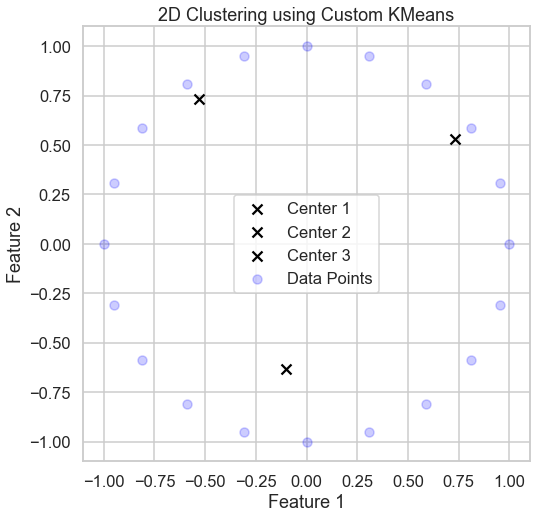

In [65]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Number of clusters
num_clusters = 3

# Generate random cluster centroids within the range of data points
# For example, random centroids within the range [-1, 1] for both x and y coordinates
Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

km1=GUC_Kmean(Cluster_Centroids,X1,"Euclidean")
display_clusters_2d(X1,km1)


> #### 2.3. Example 2 : Multi blob Data Gen and display 

[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


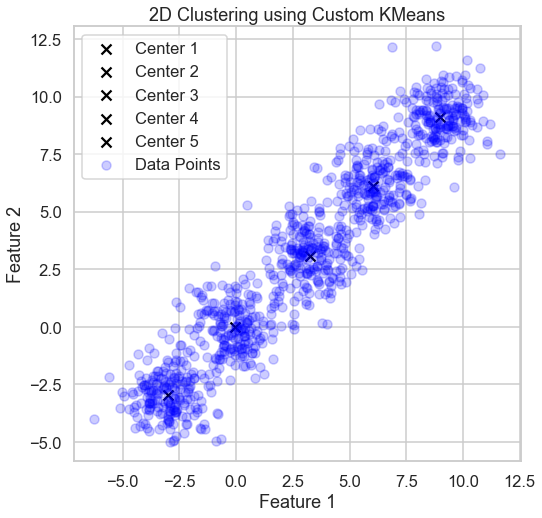

In [66]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

km2=GUC_Kmean(centers,X2,"Euclidean")
display_clusters_2d(X2,km2)

#### 2.3. Example 3 : moons Data Gen and display 

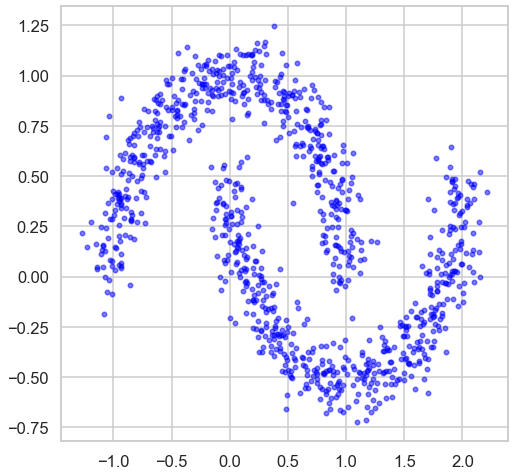

In [67]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

[[1.16616803 0.49937042 1.31240186]
 [1.37408164 0.23311657 1.45475647]
 [1.54895483 0.16191674 1.56372253]
 [1.68623664 0.40956697 1.636135  ]
 [1.78242093 0.6819632  1.66995922]
 [1.83507333 0.94292021 1.6642596 ]
 [1.84286698 1.18250276 1.61919321]
 [1.80560579 1.39386911 1.53601052]
 [1.724228   1.57145422 1.41706609]
 [1.60078933 1.71071842 1.26586475]
 [1.43843021 1.80814699 1.08722088]
 [1.24134161 1.86129606 0.88776769]
 [1.014775   1.86883636 0.67765753]
 [0.76526815 1.83057949 0.47698023]
 [0.50200096 1.74748178 0.34012361]
 [0.24806293 1.62162506 0.36699842]
 [0.18130258 1.45617774 0.53165893]
 [0.41087354 1.25534667 0.73832211]
 [0.67532745 1.02435248 0.94676902]
 [0.93086136 0.76955106 1.14106717]]
0.3859561508623566


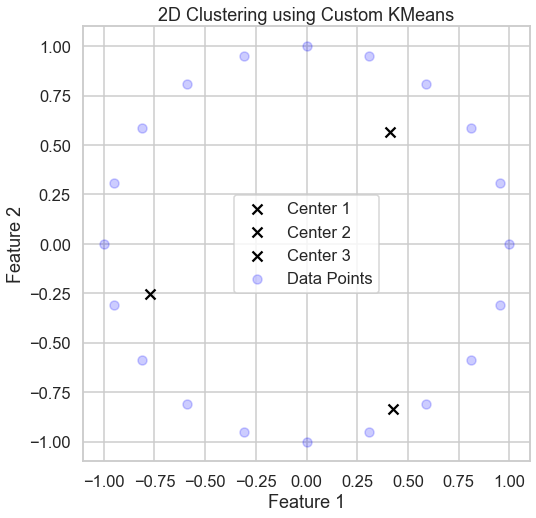

In [87]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Number of clusters
num_clusters = 3

# Generate random cluster centroids within the range of data points
# For example, random centroids within the range [-1, 1] for both x and y coordinates
Cluster_Centroids = np.random.uniform(low=-1, high=1, size=(num_clusters, 2))

km1=GUC_Kmean(Cluster_Centroids,X1,"Euclidean")
display_clusters_2d(X1,km1)


[[ 0.51559865  4.01436706  8.24405505 12.48253759 16.72312906]
 [ 1.65502882  2.77755468  6.97785781 11.21009319 15.44803803]
 [ 0.33113127  4.57377196  8.81641264 13.05905333 17.30169402]
 ...
 [17.98296694 13.74254377  9.5041001   5.27241198  1.12638243]
 [16.33942791 12.10071402  7.86623514  3.65075757  0.88227336]
 [16.33371361 12.09289121  7.85403307  3.62403824  0.76254232]]
17.52100214253117


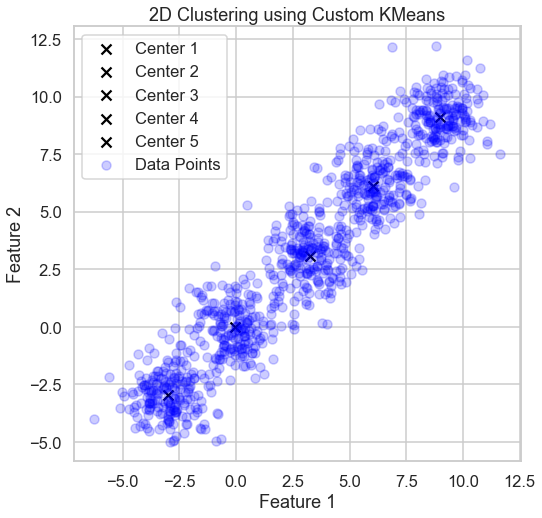

In [84]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

km2=GUC_Kmean(centers,X2,"Euclidean")
display_clusters_2d(X2,km2)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [ ]:
import pandas as pd
data = pd.read_csv(r"C:/Users/yomna/Downloads/kmeans/Customer data.csv")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



def test(data, num_clusters_range, Distance_Type, Cluster_Centroids):
    for idx, df in enumerate(data):
        for num_clusters in num_clusters_range:
            # Apply GUC_Kmean function
            GUC_Kmean_result = GUC_Kmean(Cluster_Centroids, df, Distance_Type)
            
            # Display clusters using the display_cluster function
            display_cluster1(df.values, GUC_Kmean_result, num_clusters=num_clusters)
            
            # Plot the results
            plt.title(f'Example {idx + 1} - {num_clusters} Clusters')
            plt.show()

# Varying number of cluster centroids from 2 to 10
num_clusters_range = range(2, 11)
centroids = np.array([[4, 0], [6, 5]])

# Assuming data is a list of DataFrames
test(data, num_clusters_range, "Euclidean", centroids)





TypeError: iteration over a 0-d array